# Proyecto 2

## Parte 1: Conocimiento teórico de Álgebra Lineal

1. ¿Por qué una matriz equivale a una transformación lineal entre espacios vectoriales?
2. ¿Cuál es el efecto de transformación lineal de una matriz diagonal y el de una matriz ortogonal?
3. ¿Qué es la descomposición en valores singulares de una matriz?
4. ¿Qué es diagonalizar una matriz y que representan los eigenvectores?
5. ¿ Intuitivamente qué son los eigenvectores?
6. ¿Cómo interpretas la descomposición en valores singulares como una composición de tres tipos
de transformaciones lineales simples?
7. ¿Qué relación hay entre la descomposición en valores singulares y la diagonalización?
8. ¿Cómo se usa la descomposición en valores singulares para dar un aproximación de rango menor
a una matriz?
9. Describe el método de minimización por descenso gradiente
10. Menciona 4 ejemplo de problemas de optimización (dos con restricciones y dos sin restricciones) que te parecan interesantes como Científico de Datos

### Pregunta 1

Una matriz equivale a una transformación lineal entre espacios vectoriales porque la mayoría de las transformaciones lineales pueden ser descritas en términos matriciales. Esto quiere decir que se puede tomar un espacio vectorial, y al multipicarlo por cierta matriz el espacio anterior puede representar un nuevo espacio vectorial.


### Pregunta 2

Una matriz diagonal es una transformación lineal uno a uno, (por lo que al realizar la transformación ningun vector se colapsa) lo que permite obtener todos los vectores de la imágen utilizando la transformación en los vectores del dominio.

El efecto de transformación de una matriz ortogonal es el de preservar los ángulos y dimensiones entre vectores que se están transformando.

### Pregunta 3

La descomposición de valores singulares de una matriz es la factorización última y mejor de una matriz de la siguiente manera:

\begin{equation*}
Ax = U \Sigma V^T
\end{equation*}

Donde:
\begin{equation*}
U = Matriz Ortogonal\\
\Sigma = Matriz Diagonal\\
V^T = Ortogonal\\
\end{equation*}

Ventaja: No es necesario tener matrices cuadradas


### Pregunta 4

En el caso de los eigenvalores y eigenvectores, diagonalizar una matriz significa factorizar los eigenvalores para que puedan multiplicar a las columnas de eigenvectores individualmente. 

Los eigenvectores representan el sistema de coordenadas, la dirección.


### Pregunta 5

Eigenvectores: Intuitivamente, son vectores que despúes de haberlos transformado con una matriz Ax, tienen una dirección paralela a 'x' (sin importar si es positiva o negativa).

### Pregunta 6

La descomposición en valores singulares como una composición de tres tipos de transformaciones lineales simples se puede interpetar de la siguiente manera:

Rotación + Redimensión de los ejes canónicos + Rotación



### Pregunta 7

La relación entre Valores Singulares y diagonalización es que en ambos casos se obtienen por separado los eigenvalores de los eigenvectores.

La SVD te da información similar a la diagonalización pero para matrices que no sean cuadradas.

### Pregunta 8

Se utiliza para saber a qué valores de x en la ecuación Ax=y se aproximan más, considerando que A tiene rango menor.

### Pregunta 9

La minimización por descenso gradiente es un método de optimización en el que se busca la pendiente de una curva, superficie, etc. que vaya en descenso; al momento de encontrar una pendiente que no sea decrecientese dice que este último valor con pendiente negativa es el mínimo.

### Pregunta 10

Ejemplos de optimización (con restricciones) que me parecen importantes como científico de datos:

#### Con restricción

1) Optimización para el análisis de "multibody dynamics", dónde se busca optimizar el comportamiento de cierto mecanismo para que cumpla con objetivos establecidos de comportamientos. La restricción en este caso es la unión con otros sistemas o mecanismos; lo que haría que los resultados se vean acotados por los de otro sistema.

2) Para mí es de gran interés e importancia este tipo de investigación para análisis de consumo en los supermerados, donde se optimiza los productos seleccionados a que haya la mayor cantidad de venta de cierta marca. Bajo esta optimización hay distintas restricciones como: el catálogo que tiene la empresa, las características demográficas a las que se quiere enfocar cada producto o la calidad del producto que se quiere comercializar.

#### Sin restricción

3) Optimización de ciclos de vida del motor de un automóvil. En este caso se busca maximizar la vida útil del motor involucrando una gran cantidad de factores donde también se tienen que combinar con itinerarios de mantenimiento preventivo entre otras cosas.

4) Optimización de una empresa manufurera; en este tipo de negocio hay distintas áreas que necesitan optimización; tales pueden ser: supply chain, procesos de manufactura, logística, etc.

## Parte 2: Comprimir una imágen

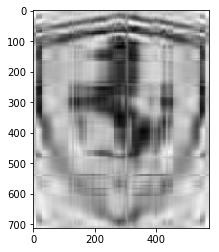

In [28]:
#Importar Librerías
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

#Abrir imágen
im = Image.open("/escudo_ferrari.png")

#Convertir imágen a blanco y negro
im_gray = im.convert('LA')

#Convertir los True y False en 1s y 0s
matrix_im = np.array(list(im_gray.getdata(band=0)), float)
matrix_im.shape = (im_gray.size[1], im_gray.size[0])
matrix_im = np.matrix(matrix_im)

#Hacer la descomposición en valores singulares
U, s, V = np.linalg.svd(matrix_im)

#Reconstruir la imágen con el número de vectores requeridos
build_image = np.matrix(U[:, :5]) * np.diag(s[:5]) * np.matrix(V[:5, :])

#Mostrar imágen
plt.imshow(build_image, cmap='gray')
plt.show()

A continuación se puede también observar la reconstrucción de la imágen con 50 vectores principales, mostrando una calidad excelente en la imágen.

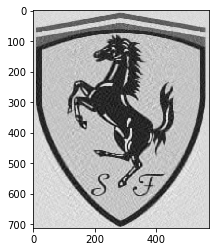

In [2]:
#Importar Librerías
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

#Abrir imágen
im = Image.open("/escudo_ferrari.png")

#Convertir imágen a blanco y negro
im_gray = im.convert('LA')

#Convertir los True y False en 1s y 0s
matrix_im = np.array(list(im_gray.getdata(band=0)), float)
matrix_im.shape = (im_gray.size[1], im_gray.size[0])
matrix_im = np.matrix(matrix_im)

#Hacer la descomposición en valores singulares
U, s, V = np.linalg.svd(matrix_im)

#Reconstruir la imágen con el número de vectores requeridos
build_image = np.matrix(U[:, :50]) * np.diag(s[:50]) * np.matrix(V[:50, :])

#Mostrar imágen
plt.imshow(build_image, cmap='gray')
plt.show()

## Parte 3: Operaciones con Pseudoinversa

In [4]:
#Importar libererías
import numpy as np

#Hacer pseudoinversa de la matriz
def pseudoinverse(mat_A):
    #Obtener SVD
    U, s, Vt = np.linalg.svd(mat_A)
    #Hacer inversa
    s_inv = 1/s
    #infinitos convertir en ceros
    NaN = np.isinf(s_inv)
    s_inv[NaN]=0
    #diagonalizar s
    sd_inv = np.diag(s_inv)
    V = np.transpose(Vt)
    Ut = np.transpose(U)
    pseudo_pt_1 = np.dot(V, sd_inv)
    pseudo = np.dot(pseudo_pt_1, Ut)
    return pseudo

#Resolver ecuación Ax=b con método de pseudoinversa
def solve_with_pseudo(A,b):
    pseudo_A = pseudoinverse (A)
    x = np.matmul(pseudo_A,b)
    return x

### a) ¿Cuál es la imágen de la matriz?

La imágen de esta matriz es:

\begin{equation*}
\{(x \ , \ 0): x \ \epsilon \ R \}
\end{equation*}

### b) ¿La solución resultante es única? Si hay más de una solución, investigar que carateriza a la solución devuelta.

La solución resultante no es única; debido a que la matriz es singular (no es invertible y su determinante = 0). Se puede decir que hay una infinidad de resultados.

### c) Cambiando  A=[[1,1],[0,1e-32]], ¿En este caso la solucíon es única? ¿Cambia el valor devuelto de x en cada posible valor de b del punto anterior?

Iterando con el código anterior se puede observar que hay una solución única a pesar de que el valor 1e-32 se aproxime a cero. Es muy importante en este caso considerar el valor exacto y no cero.

## Parte 4: Ajuse de mínimos cuadrados

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Crear Data Frame con archivo CSV
df = pd.DataFrame(pd.read_csv("study_vs_sat.csv", parse_dates=True))

# Cambiar nombre a columnas
newcols = {
    'Unnamed: 0': 'study_hours', 
    'Unnamed: 1': 'sat_score',}
df.rename(columns=newcols, inplace=True)

#Borrar columnas vacías
df.drop('Unnamed: 2', axis=1, inplace=True)
df.drop('Unnamed: 3', axis=1, inplace=True)
df.drop('Unnamed: 4', axis=1, inplace=True)
df.drop('Unnamed: 5', axis=1, inplace=True)
df.drop('Unnamed: 6', axis=1, inplace=True)

study_hours = df.study_hours
sat_score = df.sat_score

#Comenzar OLS
#Definir X
#Convertir DataFrame en Array
df_mat = np.array(df)

x = study_hours
y = sat_score

n = len(x)
xi_sum = np.sum(x)
yi_sum = np.sum(y)
xy = np.multiply(x,y)
xy_sum = np.sum(xy)
x_sq = x**2
x_sq_sum = np.sum(x_sq)
beta = ((n*(xy_sum))-(xi_sum*yi_sum))/((n*x_sq_sum)-(xi_sum**2))
alpha = (yi_sum-(beta*xi_sum))/n
y = alpha + beta*x

def matrix_solve(data):
    #Calcular Alpha y Beta
    df_mat_2 = np.insert(df_mat, 0, 1, axis=1)
    df_mat_X = df_mat_2[:, 0:2]
    df_mat_Xt = np.transpose(df_mat_X)
    XXt = np.matmul(df_mat_Xt, df_mat_X)
    XXt_inv = np.linalg.inv(XXt)
    XXt_inv_Xt = np.matmul(XXt_inv,df_mat_Xt)
    df_mat_Y = df_mat_2[:, 2:3]
    Alpha_Beta = np.matmul(XXt_inv_Xt,df_mat_Y)
    alpha = Alpha_Beta[0]
    beta = Alpha_Beta[1]
    #Calcular Y
    Y_hat = np.matmul(df_mat_X,Alpha_Beta)
    Beta_norm = np.linalg.norm(beta)
    return(Y_hat)
    


def predictions(df_mat_X,alpha,beta):
    predict = np.matmul(df_mat_X,Beta)
    return predict
        
def res_w_pseudoinverse():
    df_mat_2 = np.insert(df_mat, 0, 1, axis=1)
    df_mat_X = df_mat_2[:, 0:2]
    pseudo_X = np.linalg.pinv(df_mat_X)
    result = np.matmul(pseudo_X, sat_score)
    return result

def plot(df_mat):
    input = df_mat
    plt.figure(1)
    x_axis = np.linspace(0, len(input))
    y_axis = np.array(alpha +  beta * x_axis)
    plt.plot(x_axis, y_axis, color='b')
    plt.scatter(input[:, 0], input[:, 1], color='r')
    return plt.show()
(2*(y-alpha-(beta*x)))
    

### El gradiente de la función es:

In [56]:
grad_desc_x = -sum((2*(y-alpha-(beta*x))*x))
grad_desc_y = sum((2*(y-alpha-(beta*x))))
print ("El mínimo por descenso gradiente es ",grad_desc_y,", ",grad_desc_x)

El mínimo por descenso gradiente es  -3.41060513165e-13 ,  5.91171556152e-12


### Programar una función que reciba valores de alpha, beta y el vector sat_score y devuelva un vector array de numpy de predicciones alpha + beta*study_hours_i, con un valor para cada individuo

In [57]:
y

0     454.470751
1     581.103089
2     606.429557
3     707.735428
4     454.470751
5     530.450154
6     657.082493
7     910.347171
8     378.491347
9     429.144283
10    555.776622
11    631.756025
12    479.797218
13    505.123686
14    606.429557
15    631.756025
16    758.388364
17    682.408961
18    682.408961
19    606.429557
Name: study_hours, dtype: float64

### Definan un numpy array X de dos columnas, la primera con unos en todas sus entradas y la segunda con la variable study_hours. Observen que <code>X*[alpha,beta]</code> nos devuelve <code>alpha + beta*study_hours_i</code> en cada entrada y que entonces el problema se vuelve <code>sat_score ~ X*[alpha,beta]</code>

In [58]:
matrix_solve(df_mat)

array([[ 454.47075061],
       [ 581.1030895 ],
       [ 606.42955728],
       [ 707.73542839],
       [ 454.47075061],
       [ 530.45015394],
       [ 657.08249283],
       [ 910.34717061],
       [ 378.49134728],
       [ 429.14428283],
       [ 555.77662172],
       [ 631.75602506],
       [ 479.79721839],
       [ 505.12368617],
       [ 606.42955728],
       [ 631.75602506],
       [ 758.38836395],
       [ 682.40896061],
       [ 682.40896061],
       [ 606.42955728]])

### Calculen la pseudoinversa  X^+ de X y computen <code>(X^+)*sat_score</code> para obtener alpha y beta soluciones.</li> 

In [59]:
res_w_pseudoinverse()

array([ 353.1648795 ,   25.32646778])

#### Se puede observar que el resultado es el mismo utilizando la seudoinversa, que el obtenido realizando la operación:<code> Y=(X^t*X)^(-1)*X^t*study_hours</code>

### <strong>(Avanzado)</strong> Usen la libreria <code>matplotlib</code> par visualizar las predicciones  con alpha y beta solución contra los valores reales de sat_score.

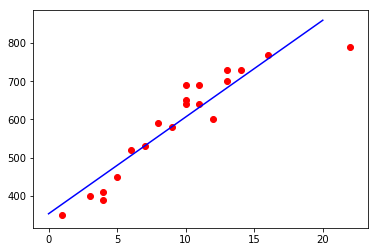

In [60]:
plot(df_mat)